In [2]:
import os
from pathlib import Path

In [3]:
#loading dive and path to kitty data
from google.colab import drive
drive.mount('/content/drive')
#%cd  '/content/drive/My Drive/Deep Learning Final Project'
!ls # (print the files and folders in the current folder)
path_kitty_data = Path('/content/drive/My Drive/mapping and perception/project_1/kitty_data')

print(path_kitty_data)

Mounted at /content/drive
drive  sample_data
/content/drive/My Drive/mapping and perception/project_1/kitty_data


In [4]:
path_oxts_kitty_data = Path('/content/drive/My Drive/mapping and perception/project_1/kitty_data/2011_09_26/2011_09_26_drive_0095_sync/oxts/data')
filelist_oxts = os.listdir(path_oxts_kitty_data)
filelist_oxts = sorted(filelist_oxts)
print(filelist_oxts)
oxts_frame_list =[] #list of frames each containing a list of the oxts data
for oxts_file in filelist_oxts:
  #print (oxts_file)
  if oxts_file.endswith(".txt"):
    with open(Path.joinpath(path_oxts_kitty_data,oxts_file),"r") as f:
      contents = f.read()
      content_list = contents.split(" ")
      oxts_frame_list.append(content_list[:6])# taking the 6 first elements-- lat: latitude of the oxts-unit (deg), lon: longitude of the oxts-unit (deg), alt: altitude of the oxts-unit (m), roll: roll angle (rad) 0 = level, positive = left side up, range: -pi .. +pi , pitch: pitch angle (rad), 0 = level, positive = front down, range: -pi/2 .. +pi/2, yaw: heading (rad), 0 = east, positive = counter clockwise, range: -pi .. +pi 
print (oxts_frame_list)
print(oxts_frame_list[1][0])

['0000000000.txt', '0000000001.txt', '0000000002.txt', '0000000003.txt', '0000000004.txt', '0000000005.txt', '0000000006.txt', '0000000007.txt', '0000000008.txt', '0000000009.txt', '0000000010.txt', '0000000011.txt', '0000000012.txt', '0000000013.txt', '0000000014.txt', '0000000015.txt', '0000000016.txt', '0000000017.txt', '0000000018.txt', '0000000019.txt', '0000000020.txt', '0000000021.txt', '0000000022.txt', '0000000023.txt', '0000000024.txt', '0000000025.txt', '0000000026.txt', '0000000027.txt', '0000000028.txt', '0000000029.txt', '0000000030.txt', '0000000031.txt', '0000000032.txt', '0000000033.txt', '0000000034.txt', '0000000035.txt', '0000000036.txt', '0000000037.txt', '0000000038.txt', '0000000039.txt', '0000000040.txt', '0000000041.txt', '0000000042.txt', '0000000043.txt', '0000000044.txt', '0000000045.txt', '0000000046.txt', '0000000047.txt', '0000000048.txt', '0000000049.txt', '0000000050.txt', '0000000051.txt', '0000000052.txt', '0000000053.txt', '0000000054.txt', '00000000

268
[48.996279047797, 48.996270995959, 48.996263665252, 48.996256318451, 48.996248223968, 48.996240875795, 48.996233496496, 48.996225375644, 48.996217949497, 48.996210503247, 48.996202224158, 48.996194683818, 48.996187133153, 48.996178749768, 48.996171095405, 48.996163392985, 48.996154891237, 48.996147092202, 48.996139247007, 48.996130573216, 48.996122706586, 48.996113992675, 48.996106042453, 48.996098036926, 48.99608917871, 48.996081158754, 48.99607312253, 48.996064338232, 48.996056318117, 48.996048326279, 48.996039515468, 48.996031544718, 48.996023595805, 48.996014868108, 48.996006993834, 48.995999076914, 48.995990422574, 48.995982558279, 48.99597477362, 48.995966238349, 48.995958499017, 48.995949977025, 48.995942286916, 48.995934616148, 48.99592617438, 48.995917773231, 48.995910938041, 48.995902633433, 48.995895042836, 48.995887478136, 48.995879175778, 48.995871663697, 48.995864177549, 48.995855963298, 48.995848543148, 48.995841054137, 48.995832879695, 48.995825480716, 48.9958174291

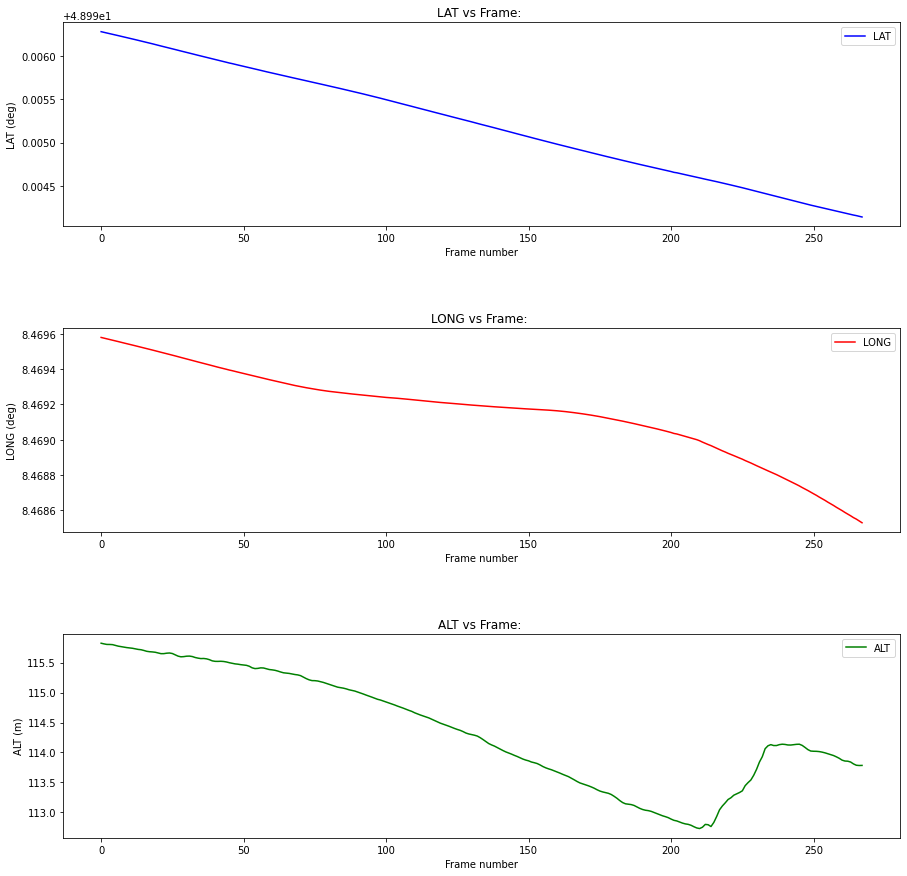

In [5]:
#LLA graph:
import matplotlib.pyplot as plt
import numpy as np

number_of_frames = len(oxts_frame_list)
print(number_of_frames)
number_of_frames_list_x_axes = np.arange(number_of_frames)

lat_list = [float(oxts_frame_list[i][0]) for i in range(number_of_frames)]
long_list = [float(oxts_frame_list[i][1]) for i in range(number_of_frames) ]
alt_list = [float(oxts_frame_list[i][2]) for i in range(number_of_frames) ]

# create a figure
fig = plt.figure(figsize=[15,15])

# define subplots and their positions in figure
plt1 = fig.add_subplot(311)
plt2 = fig.add_subplot(312)
plt3 = fig.add_subplot(313)

plt1.plot(number_of_frames_list_x_axes, lat_list, label = 'LAT', color ='b')
plt1.set_title('LAT vs Frame: ')
plt1.set_xlabel("Frame number")
plt1.set_ylabel("LAT (deg)")

plt2.plot(number_of_frames_list_x_axes, long_list , label = 'LONG', color ='r')
plt2.set_title('LONG vs Frame: ')
plt2.set_xlabel("Frame number")
plt2.set_ylabel("LONG (deg)")

plt3.plot(number_of_frames_list_x_axes, alt_list , label = 'ALT', color ='g')
plt3.set_title('ALT vs Frame: ')
plt3.set_xlabel("Frame number")
plt3.set_ylabel("ALT (m)")
print([float(oxts_frame_list[i][0]) for i in range(number_of_frames) ])
# show legends of each subplot
plt1.legend()
plt2.legend()
plt3.legend()

# adjusting space between subplots
fig.subplots_adjust(hspace=0.5)

# function to show plot
plt.show()

     |████████████████████████████████| 41 kB 528 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pymap3d: filename=pymap3d-2.7.2-py3-none-any.whl size=51820 sha256=def518d17906cb91b82f77231d3418c71a34ce4a9d9c30bad8dcd38ce0566402
  Stored in directory: /root/.cache/pip/wheels/b6/3f/e7/8ed2f9bc0be1c7e528c9932194d4e9350c969a2c6f2b63f15b
Successfully built pymap3d
268


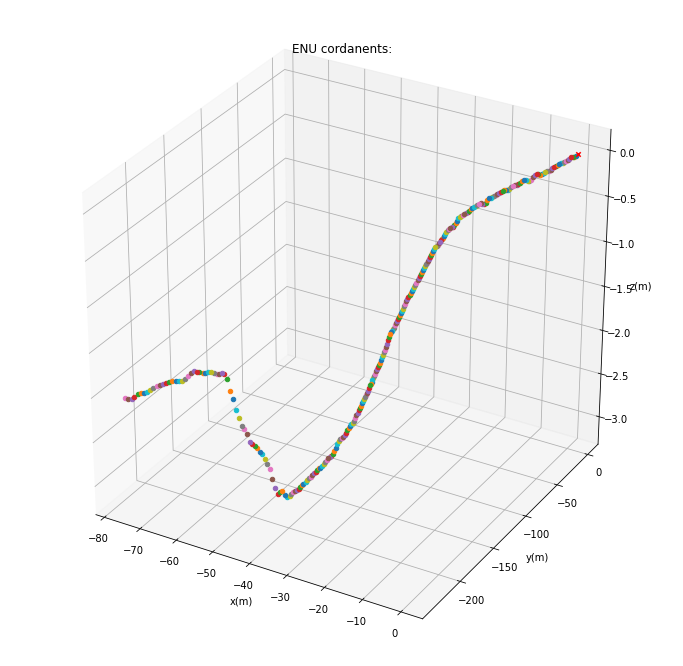

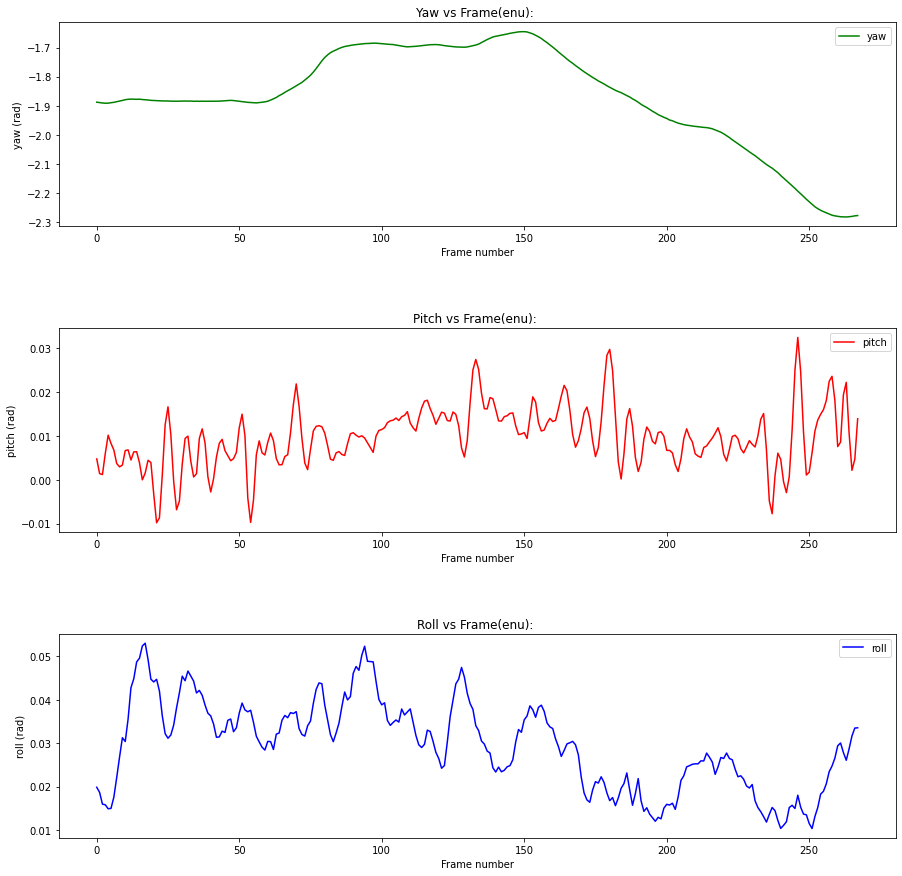

In [6]:
#transforming LLA to ENU:
import matplotlib.pyplot as plt
!pip install pymap3d
import pymap3d as pm
from mpl_toolkits.mplot3d import Axes3D
'''
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#%matplotlib notebook
'''

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(0,0,0,marker="x", c="red")
#plt.show()
lat_0 = lat_list[0]
long_0 = long_list[0]
alt_0 = alt_list[0]
ENU_cordes_list = []
ENU_cordes_list.append([0,0,0])
for i in range (number_of_frames-1):
  ENU_cordes = pm.geodetic2enu(lat_list[i+1],long_list[i+1],alt_list[i+1],lat_0,long_0,alt_0)
  #ENU_cordes = np.asarray(ENU_cordes).round()
  #print (ENU_cordes)
  ENU_cordes_list.append(ENU_cordes)
  ax.scatter(ENU_cordes[0],ENU_cordes[1],ENU_cordes[2])

ENU_x_list  = [ENU_cordes_list[i][0] for i in range(number_of_frames)]
print(len(ENU_x_list))
ENU_y_list  = [ENU_cordes_list[i][1] for i in range(number_of_frames)]
ENU_z_list  = [ENU_cordes_list[i][2] for i in range(number_of_frames)]
#ax.plot3D(ENU_x_list,ENU_y_list,ENU_z_list)
ax.set_title('ENU cordanents:')
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_zlabel('z(m)')

plt.show()

#ploting roll pitch yaw:


roll_enu_list = [float(oxts_frame_list[i][3]) for i in range(number_of_frames)]
pitch_enu_list = [float(oxts_frame_list[i][4]) for i in range(number_of_frames) ]
yaw_enu_list = [float(oxts_frame_list[i][5]) for i in range(number_of_frames) ]

# create a figure
fig = plt.figure(figsize=[15,15])

# define subplots and their positions in figure
plt1 = fig.add_subplot(313)
plt2 = fig.add_subplot(312)
plt3 = fig.add_subplot(311)

plt1.plot(number_of_frames_list_x_axes, roll_enu_list, label = 'roll', color ='b')
plt1.set_title('Roll vs Frame(enu): ')
plt1.set_xlabel("Frame number")
plt1.set_ylabel("roll (rad)")

plt2.plot(number_of_frames_list_x_axes, pitch_enu_list , label = 'pitch', color ='r')
plt2.set_title('Pitch vs Frame(enu): ')
plt2.set_xlabel("Frame number")
plt2.set_ylabel("pitch (rad)")

plt3.plot(number_of_frames_list_x_axes, yaw_enu_list , label = 'yaw', color ='g')
plt3.set_title('Yaw vs Frame(enu): ')
plt3.set_xlabel("Frame number")
plt3.set_ylabel("yaw (rad)")

# show legends of each subplot
plt1.legend()
plt2.legend()
plt3.legend()

# adjusting space between subplots
fig.subplots_adjust(hspace=0.5)

# function to show plot
plt.show()

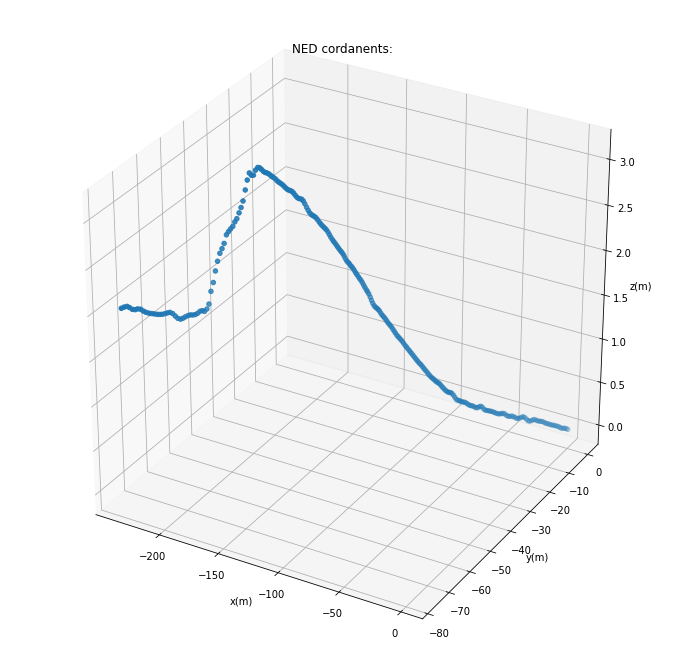

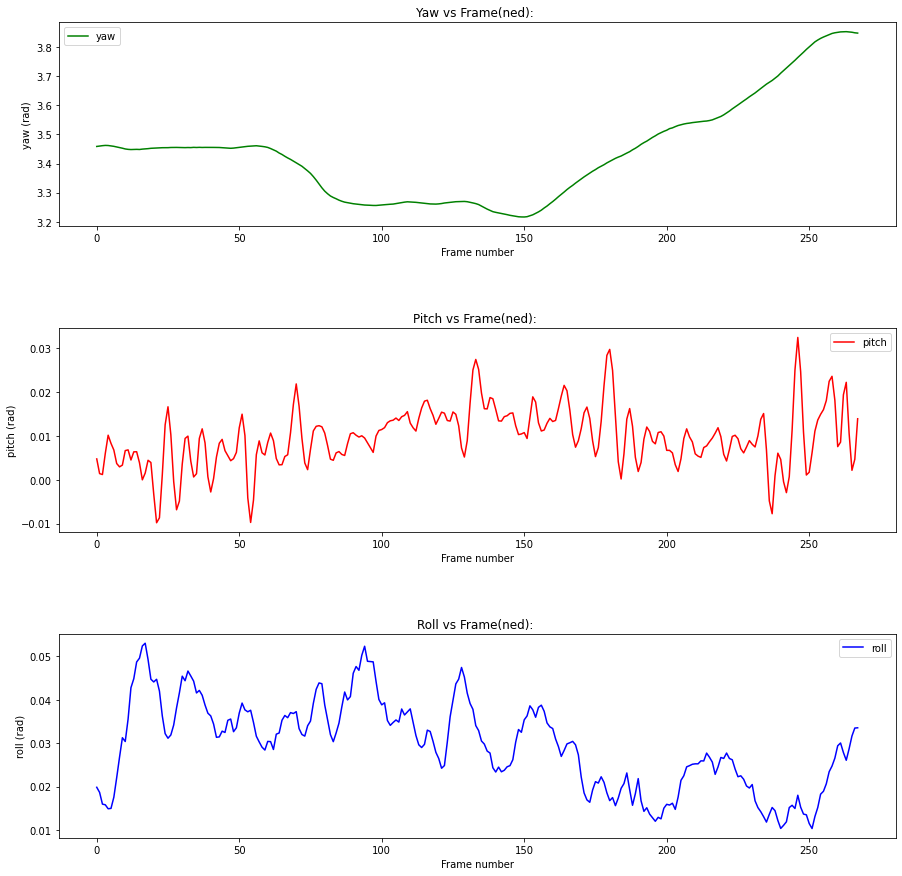

In [7]:
#transforming ENU to NED:
import math
NED_x_list = ENU_y_list
NED_y_list = ENU_x_list
NED_z_list = [-ENU_z_list[i] for i in range(number_of_frames)]
yaw_ned_list = [-yaw_enu_list[i]+math.pi/2 for i in range(number_of_frames)]
pitch_ned_list = pitch_enu_list
roll_ned_list = roll_enu_list

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(NED_x_list,NED_y_list,NED_z_list)
ax.set_title('NED cordanents:')
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_zlabel('z(m)')

plt.show()

#ploting roll pitch yaw:


# create a figure
fig = plt.figure(figsize=[15,15])

# define subplots and their positions in figure
plt1 = fig.add_subplot(313)
plt2 = fig.add_subplot(312)
plt3 = fig.add_subplot(311)

plt1.plot(number_of_frames_list_x_axes, roll_ned_list, label = 'roll', color ='b')
plt1.set_title('Roll vs Frame(ned): ')
plt1.set_xlabel("Frame number")
plt1.set_ylabel("roll (rad)")

plt2.plot(number_of_frames_list_x_axes, pitch_ned_list , label = 'pitch', color ='r')
plt2.set_title('Pitch vs Frame(ned): ')
plt2.set_xlabel("Frame number")
plt2.set_ylabel("pitch (rad)")

plt3.plot(number_of_frames_list_x_axes, yaw_ned_list , label = 'yaw', color ='g')
plt3.set_title('Yaw vs Frame(ned): ')
plt3.set_xlabel("Frame number")
plt3.set_ylabel("yaw (rad)")

# show legends of each subplot
plt1.legend()
plt2.legend()
plt3.legend()

# adjusting space between subplots
fig.subplots_adjust(hspace=0.5)

# function to show plot
plt.show()

upper_left_corner: [8.4695790221602, 48.994144184296]
lower_right_corner: [8.4685300159463, 48.996279047797]
drive  sample_data


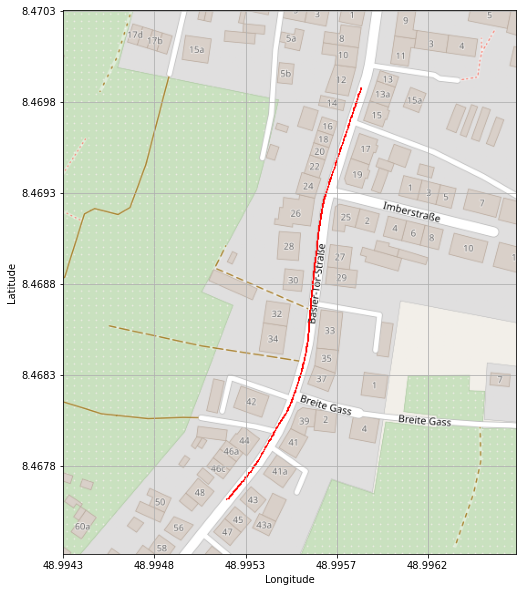

In [8]:
#Use Google Maps to find the trajectory of the recorded data. Plot the results:
from PIL import Image, ImageDraw
import pandas as pd
#from gps_class import GPSVis




# for the map at https://www.openstreetmap.org/export
max_long = max(long_list)
min_long = min(long_list)
max_lat = max(lat_list)
min_lat = min(lat_list)

upper_left_corner = [max_long,min_lat]
lower_right_corner = [min_long,max_lat]
print("upper_left_corner: {}" .format(upper_left_corner))
print("lower_right_corner: {}".format(lower_right_corner))

path_map_img = Path('/content/drive/My Drive/mapping and perception/project_1/map.png')
path_map_result = Path('/content/drive/My Drive/mapping and perception/project_1/result_map.png')

# points =[max_lat,min_long,min_lat,max_long]
def scale_to_img( lat_lon, h_w, points =[48.99668,8.46725,48.99386,8.47080] ):
    """
    Conversion from latitude and longitude to the image pixels.
    It is used for drawing the GPS records on the map image.
    :param points: Upper-left, and lower-right GPS points of the map (lat1, lon1, lat2, lon2).
    :param lat_lon: GPS record to draw (lat1, lon1).
    :param h_w: Size of the map image (w, h).
    :return: Tuple containing x and y coordinates to draw on map image.
    """
    # https://gamedev.stackexchange.com/questions/33441/how-to-convert-a-number-from-one-min-max-set-to-another-min-max-set/33445
    old = (points[2], points[0])
    new = (0, h_w[1])
    y = ((lat_lon[0] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
    old = (points[1], points[3])
    new = (0, h_w[0])
    x = ((lat_lon[1] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
    # y must be reversed because the orientation of the image in the matplotlib.
    # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
    return int(x), h_w[1] - int(y)


gps_data = tuple(zip(lat_list, long_list))

image = Image.open(path_map_img, 'r')  # Load map image.
img_points = []
for d in gps_data:
    x1, y1 = scale_to_img(d, (image.size[0], image.size[1]))  # Convert GPS coordinates to image coordinates.
    img_points.append((x1, y1))
draw = ImageDraw.Draw(image)
draw.line(img_points, fill=(255, 0, 0), width=2)  # Draw converted records to the map image.
!ls
image.save(path_map_result)

#min/max lat long in linespace
x_ticks = map(lambda x: round(x, 4), np.linspace(48.99386, 48.99668, num=7))
y_ticks = map(lambda x: round(x, 4), np.linspace(8.46725, 8.47080, num=8)) #lat
y_ticks = sorted(y_ticks, reverse=True)  # y ticks must be reversed due to conversion to image coordinates.

fig, axis1 = plt.subplots(figsize=(10, 10))
axis1.imshow(plt.imread(path_map_result))  # Load the image to matplotlib plot. 
axis1.set_xlabel('Longitude')
axis1.set_ylabel('Latitude')
axis1.set_xticklabels(x_ticks)
axis1.set_yticklabels(y_ticks)
axis1.grid()
plt.show()

starting from the top of the red line we can see that were drivung stright then turning left and then turning right this matches the photos

In [9]:
Rotation_mat_imu_to_velo = np.array([[9.999976e-01, 7.553071e-04 ,-2.035826e-03] , [-7.854027e-04, 9.998898e-01, -1.482298e-02] ,[2.024406e-03 ,1.482454e-02 ,9.998881e-01]],dtype = float)
Translation_mat_imu_to_velo = np.array([[-8.086759e-01, 3.195559e-01 ,-7.997231e-01]],dtype = float)

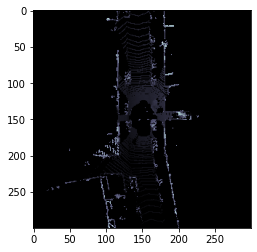

(300, 300)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
#question 2:
import cv2
from google.colab.patches import cv2_imshow

#!pip install open3d
#import open3d
#from open3d import *
#import mayavi.mlab as mlab

yaw_enu_array = np.array(yaw_enu_list,dtype = float)
roll_enu_array = np.array(roll_enu_list,dtype = float)
pitch_enu_array = np.array(pitch_enu_list,dtype = float)


# ==============================================================================
#                                                                   SCALE_TO_255
# ==============================================================================
def scale_to_255(a, min, max, dtype=np.uint8):
    """ Scales an array of values from specified min, max range to 0-255
        Optionally specify the data type of the output (default is uint8)
    """
    return (((a - min) / float(max - min)) * 255).astype(dtype)


# ==============================================================================
#                                 BIRDS_EYE_POINT_CLOUD
# ==============================================================================
def birds_eye_point_cloud(points,
                          side_range=(-30, 30),
                          fwd_range=(-30,30),
                          res=0.2,
                          min_height = -1.73,
                          max_height = 1.27,
                          saveto=None,x_and_y_vector_coirdinants_needed = False,translation_to_body_needed = True):
    """ Creates an 2D birds eye view representation of the point cloud data.
        You can optionally save the image to specified filename.

    Args:
        points:     (numpy array)
                    N rows of points data
                    Each point should be specified by at least 3 elements x,y,z
        side_range: (tuple of two floats)
                    (-left, right) in metres
                    left and right limits of rectangle to look at.
        fwd_range:  (tuple of two floats)
                    (-behind, front) in metres
                    back and front limits of rectangle to look at.
        res:        (float) desired resolution in metres to use
                    Each output pixel will represent an square region res x res
                    in size.
        min_height:  (float)(default=-2.73)
                    Used to truncate height values to this minumum height
                    relative to the sensor (in metres).
                    The default is set to -2.73, which is 1 metre below a flat
                    road surface given the configuration in the kitti dataset.
        max_height: (float)(default=1.27)
                    Used to truncate height values to this maximum height
                    relative to the sensor (in metres).
                    The default is set to 1.27, which is 3m above a flat road
                    surface given the configuration in the kitti dataset.
        saveto:     (str or None)(default=None)
                    Filename to save the image as.
                    If None, then it just displays the image.
    """
   
    
    x_lidar = points[:, 0]
    y_lidar = points[:, 1]
    z_lidar = points[:, 2]
    # r_lidar = points[:, 3]  # Reflectance
    
    # conversion to body coirdinants
    if(translation_to_body_needed):
      PC_lidar = np.array([[x_lidar],[y_lidar],[z_lidar]])
      PC_lidar = np.reshape(PC_lidar,(PC_lidar.shape[0],PC_lidar.shape[2]))
      #print("PC_lidar.shape:{}".format(PC_lidar.shape))
      PC_body_imu = np.matmul(Rotation_mat_imu_to_velo.T,PC_lidar) - Translation_mat_imu_to_velo.T
      #print("PC_body_imu.shape:{}".format(PC_body_imu.shape))
      #print("yaw_enu: {}".format(yaw_enu))
      x_lidar = PC_body_imu[0,:]
      y_lidar = PC_body_imu[1,:]
      z_lidar = PC_body_imu[2,:]

    min_height += 0.3
    max_height += 0.8
    
    # INDICES FILTER - of values within the desired rectangle
    # Note left side is positive y axis in LIDAR coordinates
    ff = np.logical_and((x_lidar > fwd_range[0]), (x_lidar < fwd_range[1]))
    ss = np.logical_and((y_lidar > -side_range[1]), (y_lidar < -side_range[0]))
    indices = np.argwhere(np.logical_and(ff,ss)).flatten()
      

    x = x_lidar[indices]
    y = y_lidar[indices]
    z = z_lidar[indices]

    if(x_and_y_vector_coirdinants_needed):
      return x, y, z
    # CONVERT TO PIXEL POSITION VALUES - Based on resolution
    x_img = (-y_lidar[indices]/res ).astype(np.int32) # x axis is -y in LIDAR
    y_img = (x_lidar[indices]/res).astype(np.int32)  # y axis is -x in LIDAR
                                                     # will be inverted later

    # SHIFT PIXELS TO HAVE MINIMUM BE (0,0)
    # floor used to prevent issues with -ve vals rounding upwards
    x_img -= int(np.floor(side_range[0]/res))
    y_img -= int(np.floor(fwd_range[0]/res))

    # CLIP HEIGHT VALUES - to between min and max heights
    pixel_values = np.clip(a = z_lidar[indices],
                           a_min=min_height,
                           a_max=max_height)


    # RESCALE THE HEIGHT VALUES - to be between the range 0-255
    pixel_values  = scale_to_255(pixel_values, min=min_height, max=max_height)

    # FILL PIXEL VALUES IN IMAGE ARRAY
    x_max = int((side_range[1] - side_range[0])/res)
    y_max = int((fwd_range[1] - fwd_range[0])/res)
    im = np.zeros([y_max, x_max], dtype=np.uint8)
    im[-y_img, x_img] = pixel_values # -y because images start from top left

    numpy_image = im
    # Convert from numpy array to a PIL image
    im = Image.fromarray(im)

    
    cropped_cloud = np.vstack([x, y, z]).transpose()
    '''
    # SAVE THE IMAGE
    if saveto is not None:
        im.save(saveto)
    else:
        im.show()
    '''
    return im, cropped_cloud , numpy_image

def load_velo_scan(file):
    """Load and parse a velodyne binary file."""
    scan = np.fromfile(file, dtype=np.float32)
    return scan.reshape((-1, 4))


def yield_velo_scans(velo_files):
    """Generator to parse velodyne binary files into arrays."""
    for file in velo_files:
        yield load_velo_scan(file)

path_velodyne_points_kitty_data = Path('/content/drive/My Drive/mapping and perception/project_1/kitty_data/2011_09_26/2011_09_26_drive_0095_sync/velodyne_points/data')
path_image_kitty_data = Path('/content/drive/My Drive/mapping and perception/project_1/kitty_data/2011_09_26/2011_09_26_drive_0095_sync/image_03/data')
filelist_velodyne_points = os.listdir(path_velodyne_points_kitty_data)
filelist_image_kitty_data = os.listdir(path_image_kitty_data)
img_demo_path = Path.joinpath(path_image_kitty_data,'0000000000.png')
img_demo = Image.open(img_demo_path)
img_demo.show()
velo_img_demo_path = Path.joinpath(path_velodyne_points_kitty_data,'0000000000.bin')
velo_img_demo = load_velo_scan(velo_img_demo_path)

image_demo_velo , cropped_cloud, image_demo_numpy = birds_eye_point_cloud(velo_img_demo)
x = cropped_cloud[:,0]
y = cropped_cloud[:,1]
z = cropped_cloud[:,2]


image_demo_velo.show()
plt.imshow(image_demo_velo,'bone')
plt.show()
#print(image_demo.size)
print(image_demo_numpy.shape)
print(image_demo_numpy)

In [11]:
#finding the measserment z_t:
res= 0.2
z_max = 30/res

def find_messerment_from_lidar_to_vehichle(numpy_image):
  #orgin of image is left corner, x-heading right, yheading down:
  r_list = []
  theta_list = []
  x_list = []
  y_list = []
  img_width = numpy_image.shape[0]
  img_hight = numpy_image.shape[1]
  for j in range(img_hight):
    for i in range(img_width):
      if (numpy_image[i][j] != 0):
        r = math.sqrt(math.pow((i-img_width/2),2) + math.pow((j-img_hight/2),2))
        theta = (np.arctan2(i-img_width/2,((img_hight/2)-j)))
        #theta = (np.arctan2(((img_hight/2)-j),i-img_width/2))
        #x_list.append(i)
        #y_list.append(j)
        #print (r)
        #print("theta: {} ,y= j: {} , i: {}".format(theta,j,i))
        r_list.append(r)
        theta_list.append (theta)
  #z_t_list = zip(r_list,theta_list,x_list,y_list)
  z_t_list = zip(r_list,theta_list)
  return np.array(list(z_t_list))


z_t = find_messerment_from_lidar_to_vehichle(image_demo_numpy)

print(z_t)
print(z_t.shape)



[[163.60012225   0.64227862]
 [161.40012392   0.64474027]
 [156.40012788   0.64477988]
 ...
 [ 76.05918748  -3.10213945]
 [ 77.1621669   -3.07674863]
 [ 77.1038261   -3.08969126]]
(7620, 2)


In [12]:
# peramters
z_max = 60/res
alpha = 0.2
beta = 0.09*np.pi/180  #opining angle in radians

l_0 = 0 

def inverse_range_sensor_model(i,x_t,z_t,l_occ = 0.85,l_free = -0.4):
  #notice to add l_occ and l_free in logits
  # z_t is an array of tuples [(r_1,theta_1),(r_2,theta_2),...].T (theta)
  z_t_theta_list = z_t[:,1]
  z_t_r_list = z_t[:,0]
  # x_i and y_i are center of mass m_i:
  x = x_t[0]
  y = x_t[1]
  yaw_i = x_t[2]

  # x and y reprsent the location of cell i in ocupancy grid:
  x_i = i[0]
  y_i = i[1]

  # calc distanse and angle from car to cell i
  r = math.sqrt(math.pow((x_i-x),2) + math.pow((y_i-y),2))
  theta = math.atan2(y_i-y,x_i-x) - yaw_i

  # find the matching angle from lidar indexed k:
  k = np.argmin(abs(theta - z_t_theta_list))

  # if out of range return l_0
  if np.logical_or(r>min(z_max, z_t_r_list[k] + alpha/2) , abs(theta - z_t_theta_list[k]) > beta/2):
    return l_0

  # if we have a hit return l_occ
  if np.logical_and(z_t_r_list[k] < z_max , abs(r-z_t_r_list[k]) < alpha/2):
    #print("hit x,y: {},{} from car location x_i, y_i {}, {} and z_t_theta_list {} and yaw {}, and theta {} ".format(x,y,x_i,y_i,z_t_theta_list[k],yaw_i,theta))
    #print (l_occ)
    return l_occ

  # if the we have a messerement in the same angle but the hit is farther away ,this means lasrer passed this cell so return l_free
  if (r <= z_t_r_list[k]):
    return l_free



In [13]:
#creating map:

res = 0.2


def occupancy_grid_mapping(occupancy_map, x_t, z_t, probability_saturation , l_occ = 0.85,l_free = -0.4):
  # x_t containing possition x_i, y_i and yaw:
  #updated_occupancy_map = occupancy_map
  map_hight = occupancy_map.shape[0]
  map_width = occupancy_map.shape[1]
  x_locatin = x_t[0]
  y_location = x_t [1]

  '''
  print("map_hight is: {}".format(map_hight))
  print("map_width is: {}".format(map_width))
  print("x_i is: {}".format(x_i))
  print("y_i is: {}".format(y_i))
  count = 0
  '''
  for j in range(map_hight):
    for i in range(map_width):
      occupancy_map_val = 0
      # cheek if m_i in perceptional field of z_t
      if (np.logical_and(abs(i-x_locatin)<(30/res),(abs(j-y_location)<(30/res)))):
        occupancy_map_val = (occupancy_map[j][i] + inverse_range_sensor_model([i,j],x_t,z_t ,l_occ ,l_free) - l_0)
        if(occupancy_map_val>probability_saturation):
          occupancy_map_val = probability_saturation
        if(occupancy_map_val<  -probability_saturation):
          occupancy_map_val = -probability_saturation
        occupancy_map[j][i] = occupancy_map_val
        
      else:
        occupancy_map[j][i] = occupancy_map[j][i]

  return occupancy_map





In [14]:
filelist_image_kitty_data = sorted(filelist_image_kitty_data)
filelist_velodyne_points = sorted(filelist_velodyne_points)

In [15]:

def create_gif(images, filename, duration=200):
    progression_pil = [Image.fromarray(im) for im in images]
    progression_pil[0].save(filename, append_images=progression_pil[1:], save_all=True, duration=duration)


In [16]:
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

ENU_y_array = np.array(ENU_y_list)
ENU_x_array = np.array(ENU_x_list)
ENU_z_array = np.array(ENU_z_list)
yaw_enu_array = np.array(yaw_enu_list)

#rearanging enu x,y cordinants to fit map:
ENU_x_array_adjusted = ENU_x_array.copy()
ENU_y_array_adjusted = ENU_y_array.copy()
ENU_x_array_adjusted += max(abs(ENU_x_array_adjusted))+30
ENU_y_array_adjusted += max(abs(ENU_y_array_adjusted))+30
ENU_x_array_adjusted = ENU_x_array_adjusted/res
ENU_y_array_adjusted = ENU_y_array_adjusted/res



def make_occupancy_map(ENU_x_array,ENU_y_array,yaw_enu_array,Occupied_threshold,free_threshold,probability_saturation,l_occ,l_free,icp_correction_needed = False):

  # occupancy_map: np of zeroes , ENU_x_array/ENU_y_array: shited and scaled x and y ,Occupied_threshold,free_threshold,probability_saturation,l_occ,l_free: all in logits
  occupancy_map = np.zeros([int(np.ceil(max(ENU_y_array))+30/res),int(np.ceil(max(ENU_x_array))+30/res)],dtype=float) # might need abs
  print("occupancy_map.shape = {}".format(occupancy_map.shape))
  img_list = []
  fig = plt.figure(figsize=(12, 12))
  for i in range(number_of_frames-1): #

    img_velo_path = Path.joinpath(path_velodyne_points_kitty_data,filelist_velodyne_points[i])  
    velo_img = load_velo_scan(img_velo_path)
    if(icp_correction_needed):
      velo_img = perform_icp_between_clouds(ENU_x_array,ENU_y_array,yaw_enu_array,i)
    else:
      img_velo_path = Path.joinpath(path_velodyne_points_kitty_data,filelist_velodyne_points[i])  
      velo_img = load_velo_scan(img_velo_path)

    _ , _, velo_image_numpy = birds_eye_point_cloud(velo_img)
    z_t = find_messerment_from_lidar_to_vehichle(velo_image_numpy)
    occupancy_map = occupancy_grid_mapping(occupancy_map,[int(np.floor(ENU_x_array[i])) ,occupancy_map.shape[0] - int(np.ceil(ENU_y_array[i])),np.pi/2-yaw_enu_array[i]],z_t,probability_saturation,l_occ,l_free)
  
    if(i%5 == 0): #
      print("filelist_image_kitty_data[i]: {}, filelist_velodyne_points[i]: {} ".format(filelist_image_kitty_data[i],filelist_velodyne_points[i]))
      img_rgb_path = Path.joinpath(path_image_kitty_data, filelist_image_kitty_data[i])
      img_rgb = Image.open(img_rgb_path)

      #zoom in to relvent area and display it:
      zoomed_occupancy_map = np.zeros((int(2*40/res),int(2*40/res)),dtype= float)
      print("zoomed_occupancy_map before copy{}".format(zoomed_occupancy_map.shape))
      zoomed_occupancy_map = occupancy_map[int(occupancy_map.shape[0]-int(np.ceil(ENU_y_array[i]))-30/res) :  int(occupancy_map.shape[0]-np.ceil(ENU_y_array[i])+30/res) , int(np.floor(ENU_x_array[i]-30/res)) : int(np.floor(ENU_x_array[i]+30/res))].copy()
      #print ("zoomed in location: y1={} y2= {}".format(int(occupancy_map.shape[0]-np.floor(ENU_y_array[i])-40/res) , int(occupancy_map.shape[0]-np.floor(ENU_y_array[i]) + 40/res)))
      #print ("zoomed in location: x1={} x2= {}".format(int(np.floor(ENU_x_array[i]-40/res)),int(np.floor(ENU_x_array[i]+40/res))))
      #print("occupancy_map.shape[0] {}".format(occupancy_map.shape[0]))

      zoomed_occupancy_map[np.where(zoomed_occupancy_map < free_threshold)] = 0
      zoomed_occupancy_map[np.where(zoomed_occupancy_map > Occupied_threshold)] = 1

      zoomed_occupancy_map = np.uint8(zoomed_occupancy_map*255)
      zoomed_occupancy_map = 255 - zoomed_occupancy_map
      #print("zoomed_occupancy_map:{}".format(zoomed_occupancy_map.shape))
      #print("velo_image_numpy: {}".format(velo_image_numpy.shape))
      zoomed_occupancy_map_image = Image.fromarray(zoomed_occupancy_map)
      
      #plot on one figure:
      
      fig = plt.figure(figsize=(12, 12))
      plt.axis('off')
      # setting values to rows and column variables
      
      rows = 2
      columns = 2
      # Adds a subplot at the 1st position
      fig.add_subplot(rows, 0.5*columns, 1)
      # showing image
      plt.imshow(img_rgb)
      
      plt.title("Scene image")
      # Adds a subplot at the 3rd position
      fig.add_subplot(rows, columns, 3)
      # showing image
      plt.imshow(Image.fromarray(255-velo_image_numpy),cmap = 'bone')
      
      plt.title("Instantaneous Point Cloud")
      # Adds a subplot at the 4th position
      fig.add_subplot(rows, columns, 4)
      # showing image
      plt.imshow(zoomed_occupancy_map_image, cmap= 'bone')
      plt.title("Occupancy Map")

      
      canvas = FigureCanvas(fig)
      canvas.draw()       # draw the canvas, cache the renderer   
      image_from_plot = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
      image = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))

      img_list.append(image)
      plt.clf()
      print("image mumber: {}".format(i))

  
  
  
  create_gif(img_list,'/content/drive/My Drive/mapping and perception/project_1/{}.gif'.format(l_occ) )
 
  occupancy_map[np.where(occupancy_map < free_threshold)] = 0
  occupancy_map[np.where(occupancy_map > Occupied_threshold)] = 1

  occupancy_map = np.uint8(occupancy_map*255)
  occupancy_map = 255 - occupancy_map
  occupancy_map_image = Image.fromarray(occupancy_map)

  fig = plt.figure(figsize=(12, 12))
  plt.imshow(occupancy_map_image,'bone')
  plt.show()
  print("occupancy_map.shape : {}".format(occupancy_map.shape))





'\n#things to do: save images as gifs, enalrge the full occupany map ,run again with 5 Change parameters.\no Hit/Miss prob 0.9/0.1\no Hit/Miss prob 0.6/0.4\no Threshold 0.6/0.75/0.9\nadd car center\nsave as gif\n'

ENU_x_array_adjusted[0]: 583.8401538890103 ,ENU_y_array_adjusted[0]: 1387.105608824927
occupancy_map.shape = (1538, 734)
filelist_image_kitty_data[i]: 0000000000.png, filelist_velodyne_points[i]: 0000000000.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 0
x cordinant in img: 583
filelist_image_kitty_data[i]: 0000000005.png, filelist_velodyne_points[i]: 0000000005.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 5
x cordinant in img: 576
filelist_image_kitty_data[i]: 0000000010.png, filelist_velodyne_points[i]: 0000000010.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 10
x cordinant in img: 569
filelist_image_kitty_data[i]: 0000000015.png, filelist_velodyne_points[i]: 0000000015.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 15
x cordinant in img: 562
filelist_image_kitty_data[i]: 0000000020.png, filelist_velodyne_points[i]: 0000000020.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 20
x cordinant in img: 554
fileli

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


image mumber: 95
x cordinant in img: 462
filelist_image_kitty_data[i]: 0000000100.png, filelist_velodyne_points[i]: 0000000100.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 100
x cordinant in img: 459
filelist_image_kitty_data[i]: 0000000105.png, filelist_velodyne_points[i]: 0000000105.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 105
x cordinant in img: 457
filelist_image_kitty_data[i]: 0000000110.png, filelist_velodyne_points[i]: 0000000110.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 110
x cordinant in img: 454
filelist_image_kitty_data[i]: 0000000115.png, filelist_velodyne_points[i]: 0000000115.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 115
x cordinant in img: 451
filelist_image_kitty_data[i]: 0000000120.png, filelist_velodyne_points[i]: 0000000120.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 120
x cordinant in img: 448
filelist_image_kitty_data[i]: 0000000125.png, filelist_velodyne_points[i]: 0000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

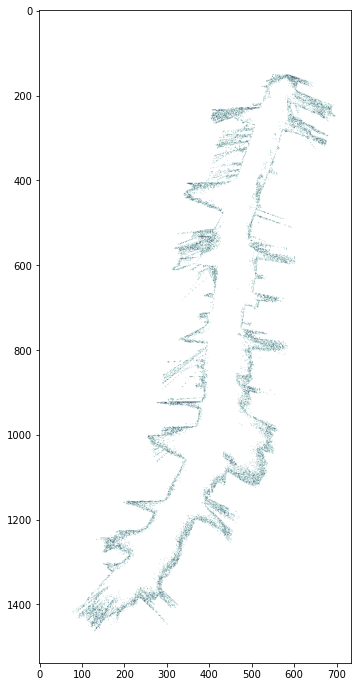

occupancy_map.shape : (1538, 734)
occupancy_map.shape = (1538, 734)
filelist_image_kitty_data[i]: 0000000000.png, filelist_velodyne_points[i]: 0000000000.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 0
x cordinant in img: 583
filelist_image_kitty_data[i]: 0000000005.png, filelist_velodyne_points[i]: 0000000005.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 5
x cordinant in img: 576
filelist_image_kitty_data[i]: 0000000010.png, filelist_velodyne_points[i]: 0000000010.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 10
x cordinant in img: 569
filelist_image_kitty_data[i]: 0000000015.png, filelist_velodyne_points[i]: 0000000015.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 15
x cordinant in img: 562
filelist_image_kitty_data[i]: 0000000020.png, filelist_velodyne_points[i]: 0000000020.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 20
x cordinant in img: 554
filelist_image_kitty_data[i]: 0000000025.png, filelist_velo

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

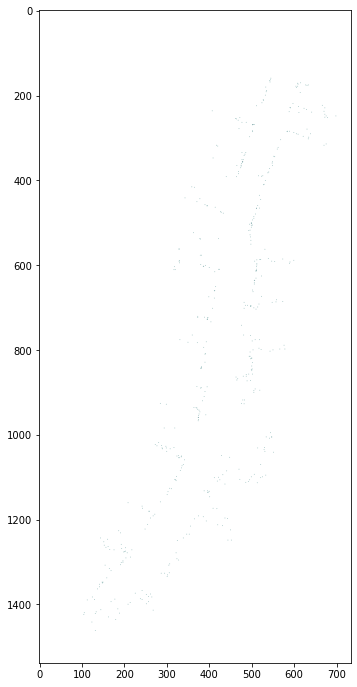

occupancy_map.shape : (1538, 734)


In [26]:

def logits(x):
  return (np.log(x) - np.log(1-x))

# defining first section 1:

#rearanging enu x,y cordinants to fit map:
ENU_x_array_adjusted = ENU_x_array.copy()
ENU_y_array_adjusted = ENU_y_array.copy()
ENU_x_array_adjusted += max(abs(ENU_x_array_adjusted))+40
ENU_y_array_adjusted += max(abs(ENU_y_array_adjusted))+40
ENU_x_array_adjusted = ENU_x_array_adjusted/res
ENU_y_array_adjusted = ENU_y_array_adjusted/res
print("ENU_x_array_adjusted[0]: {} ,ENU_y_array_adjusted[0]: {}".format(ENU_x_array_adjusted[0],ENU_y_array_adjusted[0]))


# defining second qustion section 2:
probability_saturation = (np.log(0.95)-np.log(0.05))
Occupied_threshold_1 = (np.log(0.8) - np.log(0.2))
free_threshold_1 = (np.log(0.2) - np.log(0.8))
l_occ_1 = 0.85
l_free_1 = -0.4
#make_occupancy_map(ENU_x_array_adjusted, ENU_y_array_adjusted, yaw_enu_array, Occupied_threshold_1, free_threshold_1, probability_saturation, l_occ_1, l_free_1)

'''
# make_occupancy_map(ENU_x_array,ENU_y_array,yaw_enu_array,Occupied_threshold,free_threshold,probability_saturation,l_occ,l_free):
# occupancy_map: np of zeroes , ENU_x_array,ENU_y_array: shited and scaled x and y ,yaw_enu_array,Occupied_threshold,free_threshold,probability_saturation,l_occ,l_free: all in logits
'''





occupancy_map = np.zeros([int(np.floor((max(abs(ENU_y_array)+100))/res)),(int(np.floor(max(abs(ENU_x_array)+100))/res))],dtype=float) # might need abs
Occupied_threshold_2 = logits(0.9)
free_threshold_2 = logits(0.1)

l_occ_2 = logits(0.9)
l_free_2 = logits(0.1)
#make_occupancy_map( ENU_x_array_adjusted, ENU_y_array_adjusted, yaw_enu_array, Occupied_threshold_2, free_threshold_2, probability_saturation, l_occ_2, l_free_2)

Occupied_threshold_2 = logits(0.75)
free_threshold_2 = logits(0.25)
#l_occ_2 = logits(0.9)
#l_free_2 = logits(0.1)
#make_occupancy_map( ENU_x_array_adjusted, ENU_y_array_adjusted, yaw_enu_array, Occupied_threshold_2, free_threshold_2, probability_saturation, l_occ_2, l_free_2)

Occupied_threshold_2 = logits(0.6)
free_threshold_2 = logits(0.4)
l_occ_2 = logits(0.6)
l_free_2 = logits(0.4)
make_occupancy_map( ENU_x_array_adjusted, ENU_y_array_adjusted, yaw_enu_array, Occupied_threshold_2, free_threshold_2, probability_saturation, l_occ_2, l_free_2)


# defining first qustion section 3:
occupancy_map = np.zeros([int(np.floor((max(abs(ENU_y_array)+100))/res)),(int(np.floor(max(abs(ENU_x_array)+100))/res))],dtype=float) # might need abs
Occupied_threshold_3 = logits(0.9)
free_threshold_3 = logits(0.1)

l_occ_3 = logits(0.9)
l_free_3 = logits(0.1)
#make_occupancy_map( ENU_x_array_adjusted, ENU_y_array_adjusted, yaw_enu_array, Occupied_threshold_3, free_threshold_3, probability_saturation, l_occ_3, l_free_3)

Occupied_threshold_3 = logits(0.6)
free_threshold_3 = logits(0.4)
l_occ_3 = logits(0.9)
l_free_3 = logits(0.1)
make_occupancy_map( ENU_x_array_adjusted, ENU_y_array_adjusted, yaw_enu_array, Occupied_threshold_3, free_threshold_3, probability_saturation, l_occ_3, l_free_3)

Occupied_threshold_3 = logits(0.9)
free_threshold_3 = logits(0.1)
l_occ_3 = logits(0.6)
l_free_3 = logits(0.4)
#make_occupancy_map(ENU_x_array_adjusted, ENU_y_array_adjusted, yaw_enu_array, Occupied_threshold_3, free_threshold_3, probability_saturation, l_occ_3, l_free_3)


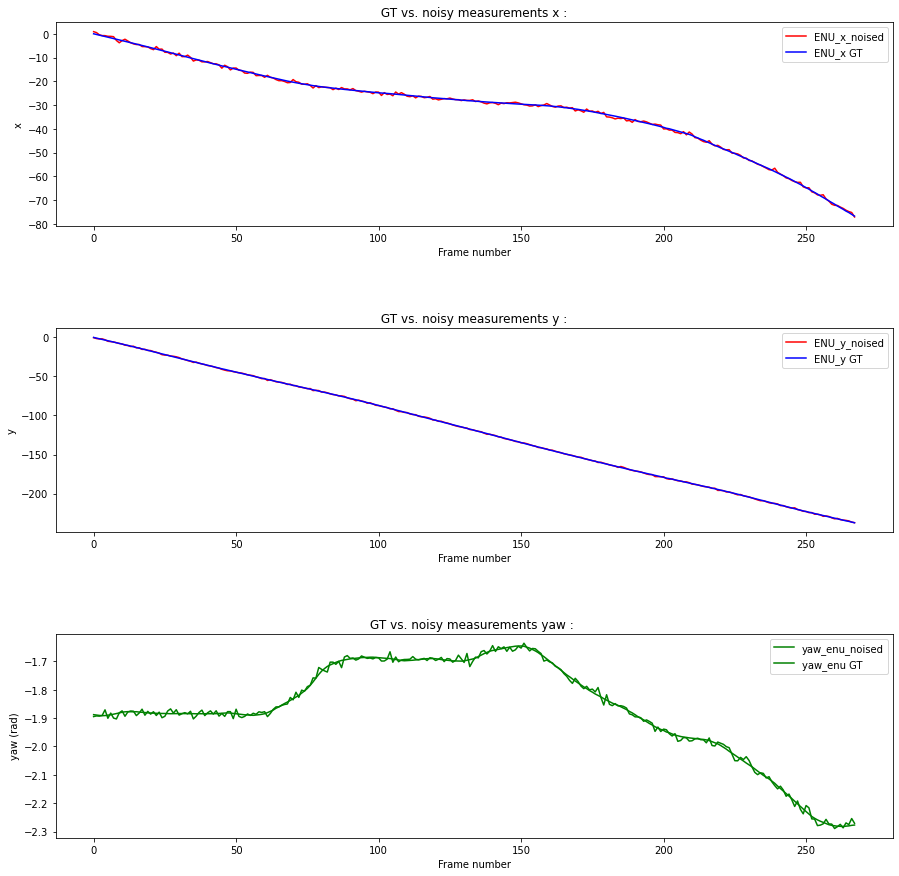

In [18]:
# question 3:

#3.1:
# x noising:
ENU_x_array_noised = ENU_x_array.copy()
noise_x = np.random.normal(0,0.5, ENU_x_array_noised.shape)
#print("noise_x: {}".format(noise_x))
ENU_x_array_noised += noise_x

#y noising:
ENU_y_array_noised = ENU_y_array.copy()
noise_y = np.random.normal(0,0.5, ENU_y_array_noised.shape)
#print("noise_y: {}".format(noise_y))
ENU_y_array_noised += noise_y

'''
#z noising: (no noise reqiured in excersice on z)
ENU_z_array_noised = ENU_z_array.copy()
noise_z = np.random.normal(0,0.5, ENU_z_array_noised.shape)
#print("noise_y: {}".format(noise_y))
ENU_z_array_noised += noise_z
'''

# yaw noising:
yaw_enu_array_noised = yaw_enu_array.copy()
noise_yaw = np.random.normal(0,0.01, yaw_enu_array_noised.shape)
#print("noise_yaw: {}".format(noise_yaw))
#print("yaw_enu_array_noised: {}".format(yaw_enu_array_noised))
yaw_enu_array_noised += noise_yaw
#print("yaw_enu_array_noised: {}".format(yaw_enu_array_noised))

# create a figure
fig = plt.figure(figsize=[15,15])

# define subplots and their positions in figure
plt1 = fig.add_subplot(311)
plt2 = fig.add_subplot(312)
plt3 = fig.add_subplot(313)

plt1.plot(number_of_frames_list_x_axes, ENU_x_array_noised, label = 'ENU_x_noised', color ='r')
plt1.plot(number_of_frames_list_x_axes, ENU_x_array, label = 'ENU_x GT', color ='b')

plt1.set_title(' GT vs. noisy measurements x : ')
plt1.set_xlabel("Frame number")
plt1.set_ylabel("x")

plt2.plot(number_of_frames_list_x_axes, ENU_y_array_noised, label = 'ENU_y_noised', color ='r')
plt2.plot(number_of_frames_list_x_axes, ENU_y_array, label = 'ENU_y GT', color ='b')

plt2.set_title(' GT vs. noisy measurements y : ')
plt2.set_xlabel("Frame number")
plt2.set_ylabel("y")

plt3.plot(number_of_frames_list_x_axes, yaw_enu_array_noised , label = 'yaw_enu_noised', color ='g')
plt3.plot(number_of_frames_list_x_axes, yaw_enu_array , label = 'yaw_enu GT', color ='g')
plt3.set_title('GT vs. noisy measurements yaw : ')
plt3.set_xlabel("Frame number")
plt3.set_ylabel("yaw (rad)")

# show legends of each subplot
plt1.legend()
plt2.legend()
plt3.legend()

# adjusting space between subplots
fig.subplots_adjust(hspace=0.5)

# function to show plot
plt.show()

ENU_x_array[0]: 540.08185534016 ,ENU_y_array[0]: 1335.0207147324386
occupancy_map.shape = (1486, 691)
filelist_image_kitty_data[i]: 0000000000.png, filelist_velodyne_points[i]: 0000000000.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 0
x cordinant in img: 540
filelist_image_kitty_data[i]: 0000000005.png, filelist_velodyne_points[i]: 0000000005.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 5
x cordinant in img: 530
filelist_image_kitty_data[i]: 0000000010.png, filelist_velodyne_points[i]: 0000000010.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 10
x cordinant in img: 521
filelist_image_kitty_data[i]: 0000000015.png, filelist_velodyne_points[i]: 0000000015.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 15
x cordinant in img: 512
filelist_image_kitty_data[i]: 0000000020.png, filelist_velodyne_points[i]: 0000000020.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 20
x cordinant in img: 504
filelist_image_kitty_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


image mumber: 95
x cordinant in img: 414
filelist_image_kitty_data[i]: 0000000100.png, filelist_velodyne_points[i]: 0000000100.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 100
x cordinant in img: 412
filelist_image_kitty_data[i]: 0000000105.png, filelist_velodyne_points[i]: 0000000105.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 105
x cordinant in img: 405
filelist_image_kitty_data[i]: 0000000110.png, filelist_velodyne_points[i]: 0000000110.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 110
x cordinant in img: 404
filelist_image_kitty_data[i]: 0000000115.png, filelist_velodyne_points[i]: 0000000115.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 115
x cordinant in img: 403
filelist_image_kitty_data[i]: 0000000120.png, filelist_velodyne_points[i]: 0000000120.bin 
zoomed_occupancy_map before copy(400, 400)
image mumber: 120
x cordinant in img: 398
filelist_image_kitty_data[i]: 0000000125.png, filelist_velodyne_points[i]: 0000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

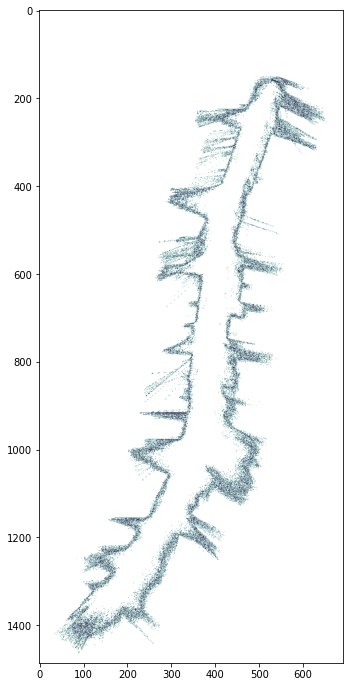

occupancy_map.shape : (1486, 691)


In [19]:
# 3.2 rearanging enu x,y cordinants to fit map:
ENU_x_array_adjusted = ENU_x_array_noised.copy()
ENU_y_array_adjusted = ENU_y_array_noised.copy()
ENU_x_array_adjusted += max(abs(ENU_x_array_adjusted))+30
ENU_y_array_adjusted += max(abs(ENU_y_array_adjusted))+30
ENU_x_array_adjusted = ENU_x_array_adjusted/res
ENU_y_array_adjusted = ENU_y_array_adjusted/res
print("ENU_x_array[0]: {} ,ENU_y_array[0]: {}".format(ENU_x_array_adjusted[0],ENU_y_array_adjusted[0]))

probability_saturation = (np.log(0.95)-np.log(0.05))
Occupied_threshold_1 = (np.log(0.8) - np.log(0.2))
free_threshold_1 = (np.log(0.2) - np.log(0.8))
l_occ_1 = 0.85
l_free_1 = -0.4
make_occupancy_map(ENU_x_array_adjusted, ENU_y_array_adjusted, yaw_enu_array_noised, Occupied_threshold_1, free_threshold_1, probability_saturation, l_occ_1, l_free_1)


In [20]:
# 3.3:


import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from math import sin, cos, atan2, pi
from IPython.display import display, Math, Latex, Markdown, HTML
from sklearn.neighbors import KDTree
#
def plot_data(data_1, data_2, label_1, label_2, markersize_1=8, markersize_2=8):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.axis('equal')
    if data_1 is not None:
        x_p, y_p = data_1
        ax.plot(x_p, y_p, color='#336699', markersize=markersize_1, marker='o', linestyle=":", label=label_1)
    if data_2 is not None:
        x_q, y_q = data_2
        ax.plot(x_q, y_q, color='orangered', markersize=markersize_2, marker='o', linestyle=":", label=label_2)
    ax.legend()
    return ax


def yaw_rotation(delt_theta):
  R_yaw = np.array([[np.cos(delt_theta), -np.sin(delt_theta)],[np.sin(delt_theta), np.cos(delt_theta)]])
  return R_yaw

# get 2 point clouds function frame i = p and frame i+1 =q and display them:
def transform_point_clouds_1_to_2(point_cloud, x_1, x_2, yaw_1, yaw_2):
  delta_theta = yaw_2 - yaw_1
  delta_x = (x_2-x_1)/10
  point_cloud_transformed = np.matmul(yaw_rotation(delta_theta), point_cloud) + delta_x.T
  return point_cloud_transformed

def transform_point_clouds_2_to_1(point_cloud, x_1, x_2, yaw_1, yaw_2):
  delta_theta = yaw_2 - yaw_1
  delta_x = (x_2-x_1)/10
  point_cloud_transformed = np.matmul(yaw_rotation(delta_theta).T, point_cloud) - delta_x.T
  return point_cloud_transformed


def get_correspondence_indices(P, Q , random_indices):
    """For each point in P find closest one in Q."""
    p_size = P.shape[1]
    q_size = Q.shape[1]
    correspondences = []
    P = P[:,random_indices].copy()
    Q = Q[:,random_indices].copy()

    

    tree = KDTree(Q.T, leaf_size=2)
    for i in range(P.shape[1]):      
      dist, ind = tree.query([P.T[i]], k=1)
      #removing indices that are not a good enough match
      if dist<0.05:      
        correspondences.append((i, int(ind)))
    return correspondences

def center_data(data, exclude_indices=[]):
    reduced_data = np.delete(data, exclude_indices, axis=1)
    center = np.array([reduced_data.mean(axis=1)]).T
    return center, data - center
    
'''    
center_of_P, P_centered = center_data(P)
center_of_Q, Q_centered = center_data(Q)
ax = plot_data(P_centered, Q_centered,
               label_1='Moved data centered',
               label_2='True data centered')
plt.show()

correspondences = get_correspondence_indices(P_centered, Q_centered)
ax = plot_data(P_centered, Q_centered,
               label_1='P centered',
               label_2='Q centered')
draw_correspondeces(P_centered, Q_centered, correspondences, ax)
plt.show()

'''

"    \ncenter_of_P, P_centered = center_data(P)\ncenter_of_Q, Q_centered = center_data(Q)\nax = plot_data(P_centered, Q_centered,\n               label_1='Moved data centered',\n               label_2='True data centered')\nplt.show()\n\ncorrespondences = get_correspondence_indices(P_centered, Q_centered)\nax = plot_data(P_centered, Q_centered,\n               label_1='P centered',\n               label_2='Q centered')\ndraw_correspondeces(P_centered, Q_centered, correspondences, ax)\nplt.show()\n\n"

In [21]:
def compute_cross_covariance(P, Q, correspondences, kernel=lambda diff: 1.0):
    cov = np.zeros((3, 3))
    exclude_indices = []
    for i, j in correspondences:
        p_point = P[:, [i]]
        q_point = Q[:, [j]]
        weight = kernel(p_point - q_point)
        if weight < 0.01: exclude_indices.append(i)
        cov += weight * q_point.dot(p_point.T)
    return cov, exclude_indices


In [22]:
from functools import partial
def kernel(threshold, error):
    if np.linalg.norm(error) < threshold:
        return 1.0
    return 0.0

In [23]:
#itrativly:
def icp_svd(P, Q, random_indices, iterations=10, kernel=lambda diff: 1.0):
    """Perform ICP using SVD."""
    center_of_Q, Q_centered = center_data(Q)
    norm_values = []
    P_values = [P.copy()]
    P_copy = P.copy()
    corresp_values = []
    exclude_indices = []
    for i in range(iterations):
        center_of_P, P_centered = center_data(P_copy, exclude_indices=exclude_indices)

        correspondences = get_correspondence_indices(P_centered, Q_centered, random_indices)
        corresp_values.append(correspondences)
        norm_values.append(np.linalg.norm(P_centered - Q_centered))
        cov, exclude_indices = compute_cross_covariance(P_centered, Q_centered, correspondences, kernel)
        U, S, V_T = np.linalg.svd(cov)
        R = U.dot(V_T)  
        t = center_of_Q - R.dot(center_of_P)  
        P_copy = R.dot(P_copy) + t
        P_values.append(P_copy)
    corresp_values.append(corresp_values[-1])
    return P_values, norm_values, corresp_values


'\nP_values, norm_values, corresp_values = icp_svd(P, Q)\nplot_values(norm_values, label="Squared diff P->Q")\nax = plot_data(P_values[-1], Q, label_1=\'P final\', label_2=\'Q\', markersize_1=15)\nplt.show()\nprint(norm_values)\n'

In [24]:
 def perform_icp_between_clouds(ENU_x_array,ENU_y_array,yaw_enu_array,i):
 
    ENU_x_y = np.array([[ENU_x_array],[ENU_y_array]])
    ENU_x_y = np.reshape(ENU_x_y,(ENU_x_y.shape[0],ENU_x_y.shape[2]))
    #print(ENU_x_y.shape)

    # geting piont cloud 1:
    img_velo_path_1 = Path.joinpath(path_velodyne_points_kitty_data,filelist_velodyne_points[i])  
    velo_im_1 = load_velo_scan(img_velo_path_1)
    x_1 , y_1, z_1 = birds_eye_point_cloud(velo_im_1,x_and_y_vector_coirdinants_needed = True)
    x_1 = np.reshape(np.array(x_1),(1,x_1.shape[0]))
    y_1 = np.reshape(np.array(y_1),(1,y_1.shape[0]))
    z_1 = np.reshape(np.array(z_1),(1,z_1.shape[0]))
    point_cloud_1 = np.array([x_1,y_1])
    point_cloud_1_original = np.reshape(point_cloud_1,(point_cloud_1.shape[0],point_cloud_1.shape[2]))
    


    # getting point cloud 2
    img_velo_path_2 = Path.joinpath(path_velodyne_points_kitty_data,filelist_velodyne_points[i+1])  
    velo_im_2 = load_velo_scan(img_velo_path_2)
    x_2 , y_2, z_2 = birds_eye_point_cloud(velo_im_2,x_and_y_vector_coirdinants_needed = True)
    x_2 = np.reshape(np.array(x_2),(1,x_2.shape[0]))
    y_2 = np.reshape(np.array(y_2),(1,y_2.shape[0]))
    z_2 = np.reshape(np.array(z_2),(1,z_2.shape[0]))
    point_cloud_2 = np.array([x_2,y_2])
    point_cloud_2 = np.reshape(point_cloud_2,(point_cloud_2.shape[0],point_cloud_2.shape[2]))
    point_cloud_2_with_z = np.concatenate((point_cloud_2,z_2),axis = 0)

    # transforming point cloud:
    point_cloud_1 = transform_point_clouds_1_to_2(point_cloud_1_original, ENU_x_array[i], ENU_x_array[i+1], yaw_enu_array[i], yaw_enu_array[i+1])
    point_cloud_1_with_z = np.concatenate((point_cloud_1,z_1),axis = 0)
    _ , _, velo_image_numpy_1 = birds_eye_point_cloud(point_cloud_1_with_z.T,translation_to_body_needed = False)
    _ , _, velo_image_numpy_2 = birds_eye_point_cloud(point_cloud_2_with_z.T,translation_to_body_needed = False)
    '''
    im_1 = Image.fromarray(velo_image_numpy_1)
    plt.imshow(im_1,cmap = 'bone')
    plt.show()

    im_2 = Image.fromarray(velo_image_numpy_2)
    plt.imshow(im_2,cmap = 'bone')
    plt.show()
    print(point_cloud_1.shape)
    
    correspondence_indice =  np.array(get_correspondence_indices(point_cloud_1_with_z,point_cloud_2_with_z))
    print(correspondence_indice.shape)
    '''


    if(point_cloud_1_with_z.shape[1]<point_cloud_2_with_z.shape[1]):
      indexes_to_make_same_size = np.ones(point_cloud_1_with_z.shape[1],dtype = bool)
      indexes_to_make_same_size = np.argwhere(indexes_to_make_same_size).flatten()
      point_cloud_2_with_z = point_cloud_2_with_z[:,indexes_to_make_same_size]

    if (point_cloud_1_with_z.shape[1]>point_cloud_2_with_z.shape[1]):
      indexes_to_make_same_size = np.ones(point_cloud_2_with_z.shape[1],dtype = bool)
      indexes_to_make_same_size = np.argwhere(indexes_to_make_same_size).flatten()
      point_cloud_1_with_z = point_cloud_1_with_z[:,indexes_to_make_same_size]
      z_1 = z_1[:,indexes_to_make_same_size]
    
    #choosing random indicies
    random_indices = np.random.choice(2,size = point_cloud_1_with_z.shape[1])
    random_indices = np.argwhere(random_indices).flatten()

    P_values, norm_values, corresp_values = icp_svd(point_cloud_1_with_z, point_cloud_2_with_z,random_indices,kernel=partial(kernel, 0.4))
    P_values = np.array(P_values[-1])
    _ , _, velo_image_numpy_3 = birds_eye_point_cloud(P_values.T,translation_to_body_needed = False)
    '''
    im_3 = Image.fromarray(velo_image_numpy_3)
    plt.imshow(im_3,cmap = 'bone')
    plt.show()
    '''
    P_values = transform_point_clouds_2_to_1(P_values[:2,:], ENU_x_array[i], ENU_x_array[i+1], yaw_enu_array[i], yaw_enu_array[i+1])
    P_values_with_z = np.concatenate((P_values,z_1),axis = 0)
    return P_values_with_z.T



perform_icp_between_clouds(ENU_x_array_noised,ENU_y_array_noised,yaw_enu_array_noised,0)
make_occupancy_map(ENU_x_array_adjusted, ENU_y_array_adjusted, yaw_enu_array_noised, Occupied_threshold_1, free_threshold_1, probability_saturation, l_occ_1, l_free_1, icp_correction_needed = True)